# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [36]:
!pip install citipy

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [38]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    #try:
    city_weather = requests.get(city_url).json()
    city_weather

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | kingston
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | papao
Processing Record 5 of Set 1 | nakhon phanom
Processing Record 6 of Set 1 | chegdomyn
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | huarmey
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | utrik
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | juan griego
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | huittinen
Processing Record 22 o

In [40]:
cities

['port elizabeth',
 'kingston',
 'port-aux-francais',
 'papao',
 'nakhon phanom',
 'chegdomyn',
 'invercargill',
 'ilulissat',
 'hilo',
 'edinburgh of the seven seas',
 'huarmey',
 'margaret river',
 'waitangi',
 'utrik',
 'blackmans bay',
 'college',
 'adamstown',
 'yellowknife',
 'juan griego',
 'hawaiian paradise park',
 'huittinen',
 'grytviken',
 'bethel',
 'yuzhno-kurilsk',
 'sihanoukville',
 'saint-pierre',
 'puerto ayora',
 'ushuaia',
 'thompson',
 'sinjhoro',
 'crane',
 'port mathurin',
 'andergrove',
 'essaouira',
 'qaisumah',
 'albany',
 'marsh harbour',
 'papatowai',
 'klyuchi',
 'puerto natales',
 'bubaque',
 'revda',
 'west island',
 'stanley',
 'okha',
 'sabang',
 'tura',
 'bardai',
 'qulsary',
 'pemba',
 'polyarnyy',
 'serra',
 'vadso',
 'thunder bay',
 'zavodskoy',
 'ponnamaravati',
 'vingt cinq',
 'daru',
 'susuman',
 'dongola',
 "krasnotur'insk",
 'udachny',
 'port glaud',
 'jamestown',
 'lihue',
 'palu',
 'nago',
 'khagaria',
 'abepura',
 'jayapura',
 'contai',
 'ba

In [41]:
query_url = f"{url}appid={weather_api_key}&units={units}&q=kingston"
result_weather = requests.get(query_url).json()
result_weather

{'coord': {'lon': -76.7936, 'lat': 17.997},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 27.53,
  'feels_like': 31.34,
  'temp_min': 25.09,
  'temp_max': 27.53,
  'pressure': 1011,
  'humidity': 83,
  'sea_level': 1011,
  'grnd_level': 981},
 'visibility': 10000,
 'wind': {'speed': 2.06, 'deg': 20},
 'clouds': {'all': 20},
 'dt': 1731311432,
 'sys': {'type': 1,
  'id': 7105,
  'country': 'JM',
  'sunrise': 1731323478,
  'sunset': 1731364282},
 'timezone': -18000,
 'id': 3489854,
 'name': 'Kingston',
 'cod': 200}

In [42]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | kingston
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | papao
Processing Record 5 of Set 1 | nakhon phanom
Processing Record 6 of Set 1 | chegdomyn
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | huarmey
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | utrik
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | juan griego
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | huittinen
Processing Record 22 o

In [56]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [57]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,18.16,90,100,4.12,ZA,1731311432
1,kingston,17.9970,-76.7936,27.53,83,20,2.06,JM,1731311432
2,port-aux-francais,-49.3500,70.2167,4.98,88,100,7.36,TF,1731311433
3,papao,-17.7500,-149.5500,25.82,92,99,10.25,PF,1731311433
4,nakhon phanom,17.3333,104.4167,31.89,42,100,2.17,TH,1731311433


In [58]:
# Create output_data directory
import os

# Specify the directory name
directory_name = "output_data"

# Create the directory
try:
    os.mkdir(directory_name)
    print(f"Directory '{directory_name}' created successfully.")
except FileExistsError:
    print(f"Directory '{directory_name}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{directory_name}'.")
except Exception as e:
    print(f"An error occurred: {e}")

Directory 'output_data' already exists.


In [59]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [60]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,18.16,90,100,4.12,ZA,1731311432
1,kingston,17.9970,-76.7936,27.53,83,20,2.06,JM,1731311432
2,port-aux-francais,-49.3500,70.2167,4.98,88,100,7.36,TF,1731311433
3,papao,-17.7500,-149.5500,25.82,92,99,10.25,PF,1731311433
4,nakhon phanom,17.3333,104.4167,31.89,42,100,2.17,TH,1731311433


In [61]:
def plot_scatter(x_values, y_values, x_label, y_label, title, output_file_path):
    # Build scatter plot for latitude vs. temperature
    plt.scatter(x_values,y_values, edgecolors="black")

    # Incorporate the other graph properties
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)

    # Save the figure
    plt.savefig(output_file_path)

    # Show plot
    plt.show()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

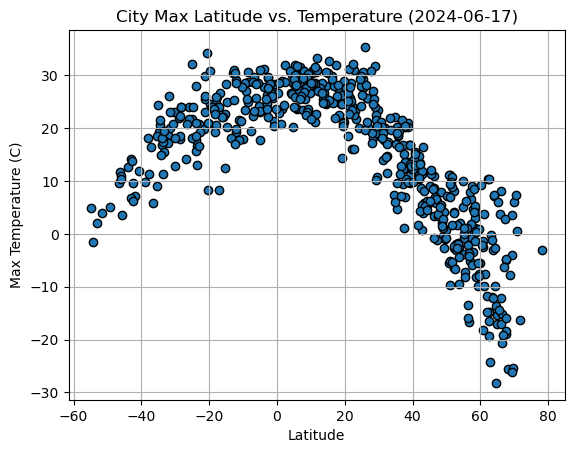

In [62]:
plot_scatter(
    x_values=city_data_df['Lat'], 
    y_values=city_data_df['Max Temp'], 
    x_label='Latitude', 
    y_label='Max Temperature (C)', 
    title=f"City Max Latitude vs. Temperature (2024-06-17)", 
    output_file_path="output_data/Fig1.png"
)

#### Latitude Vs. Humidity

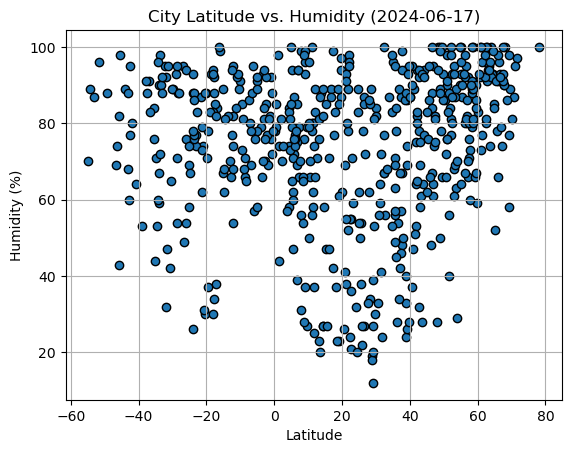

In [63]:
plot_scatter(
    x_values=city_data_df['Lat'], 
    y_values=city_data_df['Humidity'], 
    x_label='Latitude', 
    y_label='Humidity (%)', 
    title=f"City Latitude vs. Humidity (2024-06-17)", 
    output_file_path="output_data/Fig2.png"
)

#### Latitude Vs. Cloudiness

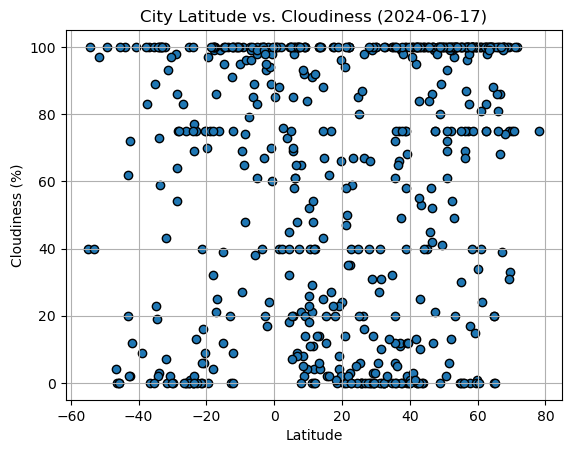

In [64]:
plot_scatter(
    x_values=city_data_df['Lat'], 
    y_values=city_data_df['Cloudiness'], 
    x_label='Latitude', 
    y_label='Cloudiness (%)', 
    title=f"City Latitude vs. Cloudiness (2024-06-17)", 
    output_file_path="output_data/Fig3.png"
)

#### Latitude vs. Wind Speed Plot

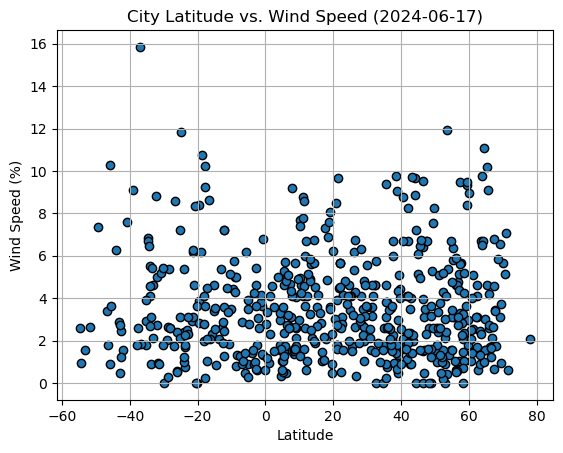

In [65]:
plot_scatter(
    x_values=city_data_df['Lat'], 
    y_values=city_data_df['Wind Speed'], 
    x_label='Latitude', 
    y_label='Wind Speed (%)', 
    title=f"City Latitude vs. Wind Speed (2024-06-17)", 
    output_file_path="output_data/Fig4.png"
)

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [66]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    print(line_eq)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Incorporate the other graph properties
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(x_values.median(), y_values.median()),fontsize=15,color="red")
    plt.title(title)
    # Print r^2 value
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kingston,17.9970,-76.7936,27.53,83,20,2.06,JM,1731311432
4,nakhon phanom,17.3333,104.4167,31.89,42,100,2.17,TH,1731311433
5,chegdomyn,51.1167,133.0167,-9.62,90,61,1.59,RU,1731311433
7,ilulissat,69.2167,-51.1000,-3.99,58,75,3.09,GL,1731311433
8,hilo,19.7297,-155.0900,21.16,94,66,0.45,US,1731311359


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,18.16,90,100,4.12,ZA,1731311432
2,port-aux-francais,-49.3500,70.2167,4.98,88,100,7.36,TF,1731311433
3,papao,-17.7500,-149.5500,25.82,92,99,10.25,PF,1731311433
6,invercargill,-46.4000,168.3500,11.68,74,0,1.79,NZ,1731311413
9,edinburgh of the seven seas,-37.0676,-12.3116,16.45,91,100,15.85,SH,1731311433


###  Temperature vs. Latitude Linear Regression Plot

y = -0.63x + 35.41
The r^2-value is: 0.7978389364407993


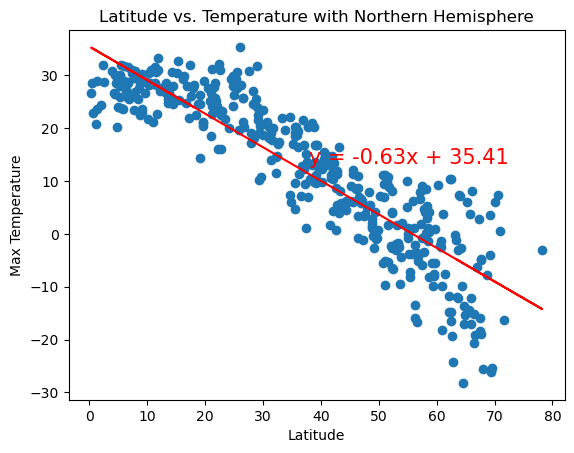

In [71]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    x_values=northern_hemi_df['Lat'],
    y_values=northern_hemi_df['Max Temp'],
    x_label='Latitude',
    y_label='Max Temperature',
    title=f"Latitude vs. Temperature with Northern Hemisphere"
)


y = 0.37x + 28.62
The r^2-value is: 0.5491524327824703


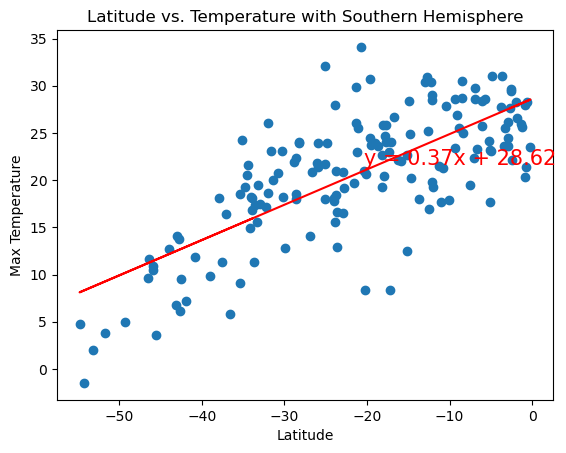

In [72]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    x_values=southern_hemi_df['Lat'],
    y_values=southern_hemi_df['Max Temp'],
    x_label='Latitude',
    y_label='Max Temperature',
    title=f"Latitude vs. Temperature with Southern Hemisphere"
)

**Discussion about the linear relationship:** 
**Temperature vs. Lattitute

1. Northern Hemisphere
    Equation: y=−0.6x+35.41
    The r^2-value is: 0.7978389364407993
-   Interpretation: The negative slope of −0.6 indicates an inverse relationship—temperature decreases as latitude increases (moving away from the equator towards the poles). As latitude increases (moving from the equator toward the poles), temperature tends to decrease.
-   R2-value: 0.7978, suggesting a strong correlation between latitude and temperature in the Northern Hemisphere, with latitude accounting for around 79.74% of the variation in temperature. This high correlation is likely due to the landmass distribution and relatively predictable climate patterns, where temperature decreases steadily with increasing latitude.

2. Southern Hemisphere
    Equation: y=0.37x+28.62
    The r^2-value is: 0.5491524327824703
-   Interpretation: The positive slope of 0.37 indicates a direct relationship—temperature increases as latitude increases (moving closer to the equator). Since latitudes in the Southern Hemisphere are negative moving towards the South Pole, a positive slope means that moving closer to the equator (higher latitude values) results in higher temperatures.
-   R2-value: 0.5492, indicating a moderate correlation, with latitude explaining about 54.9% of the temperature variation in the Southern Hemisphere. This weaker correlation likely reflects the Southern Hemisphere's unique geography, where large oceanic regions dominate and influence the climate. Oceans generally moderate temperature variations, resulting in a weaker latitude-temperature gradient compared to the Northern Hemisphere.

These findings align with the expected pattern of decreasing temperatures as one moves further from the equator, but with some variation in the strength of the relationship across hemispheres.

### Humidity vs. Latitude Linear Regression Plot

y = 0.34x + 60.65
The r^2-value is: 0.09889716229240877


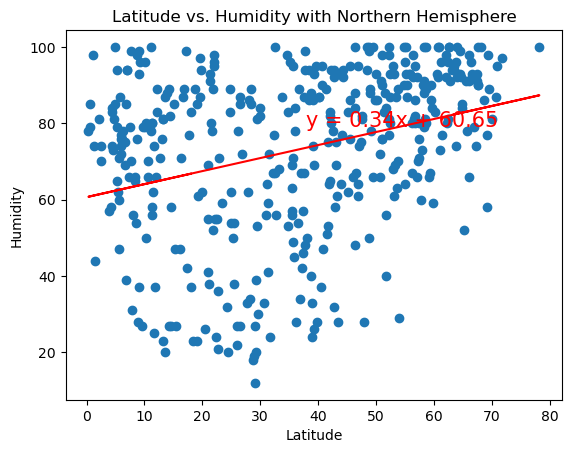

In [73]:
# Northern Hemisphere
plot_linear_regression(
    x_values=northern_hemi_df['Lat'],
    y_values=northern_hemi_df['Humidity'],
    x_label='Latitude',
    y_label='Humidity',
    title=f"Latitude vs. Humidity with Northern Hemisphere"
)

y = 0.05x + 77.76
The r^2-value is: 0.0014716813262095497


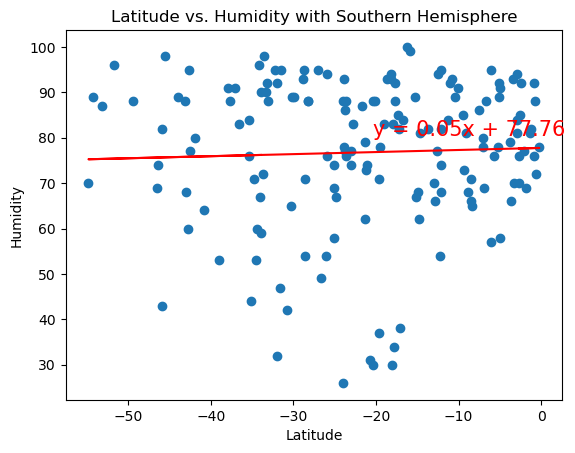

In [74]:
# Southern Hemisphere
plot_linear_regression(
    x_values=southern_hemi_df['Lat'],
    y_values=southern_hemi_df['Humidity'],
    x_label='Latitude',
    y_label='Humidity',
    title=f"Latitude vs. Humidity with Southern Hemisphere"
)

**Discussion about the linear relationship:** 
**Humidity vs. Lattitute

1. Northern Hemisphere
    Equation: y=−0.34x+60.65
    The r^2-value is: 0.09889716229240877
-   Interpretation: The positive slope of 0.34 suggests a very slight increase in humidity as latitude increases in the Northern Hemisphere, though this effect is minimal.
-   R2-value: 0.0989, indicating a very weak relationship. Only about 9.9% of the variance in humidity can be explained by latitude. This suggests that other factors, such as local climate, topography, and seasonal effects, likely play a much larger role in determining humidity levels.

2. Southern Hemisphere
    Equation: y=0.05x+77.76
    The r^2-value is: 0.0014716813262095497
-   Interpretation: The positive slope of 0.05 is close to zero, indicating almost no change in humidity with latitude in the Southern Hemisphere.
-   R2-value: 0.0014, which is extremely low, indicating that latitude has virtually no predictive power for humidity levels in the Southern Hemisphere. This weak relationship may reflect the stabilizing effect of the ocean, which covers much of the Southern Hemisphere and moderates humidity.

The findings reinforce that humidity distribution is far less latitude-dependent than temperature. Instead, humidity levels are highly localized and influenced by factors like climate zones, ocean currents, and seasonal shifts, limiting the effectiveness of a latitude-based linear model for understanding global humidity trends.

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.53x + 40.07
The r^2-value is: 0.07113874978329725


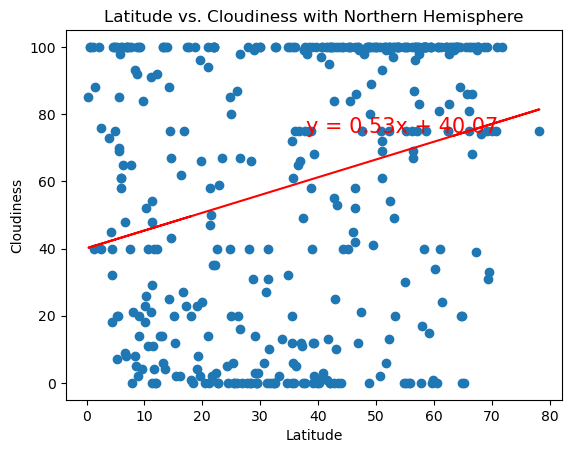

In [75]:
# Northern Hemisphere
plot_linear_regression(
    x_values=northern_hemi_df['Lat'],
    y_values=northern_hemi_df['Cloudiness'],
    x_label='Latitude',
    y_label='Cloudiness',
    title=f"Latitude vs. Cloudiness with Northern Hemisphere"
)

y = 0.77x + 76.98
The r^2-value is: 0.06990289479771386


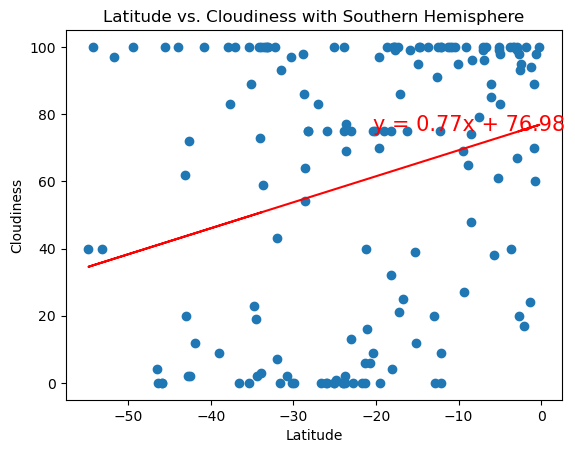

In [76]:
# Southern Hemisphere
plot_linear_regression(
    x_values=southern_hemi_df['Lat'],
    y_values=southern_hemi_df['Cloudiness'],
    x_label='Latitude',
    y_label='Cloudiness',
    title=f"Latitude vs. Cloudiness with Southern Hemisphere"
)

**Discussion about the linear relationship:** 
**Cloudiness vs. Lattitute

1. Northern Hemisphere
    Equation: y=0.53x+40.07
    The r^2-value is: 0.07113874978329725
-   Interpretation: The positive slope of 0.53 suggests a slight increase in cloudiness as latitude increases in the Northern Hemisphere. However, the slope is minimal, indicating only a slight upward trend.
-   R2-value: 0.0711, which is very low, showing that only about 7.11% of the variation in cloudiness can be explained by latitude. This weak correlation means latitude is not a significant predictor of cloudiness in the Northern Hemisphere.

2. Southern Hemisphere
    Equation: y=0.77x+76.98
    The r^2-value is: 0.06990289479771386
-   Interpretation: The positive slope of 0.77 in the Southern Hemisphere also indicates a slight increase in cloudiness as latitude rises. However, this relationship is minimal, reflecting only a slight trend.
-   R2-value: 0.0699, which is similarly low, indicating that latitude explains less than 7% of cloudiness variation in the Southern Hemisphere. Like in the Northern Hemisphere, this weak correlation suggests that cloudiness does not strongly depend on latitude.

The findings reinforce that the weak positive correlation between latitude and cloudiness highlights the limitations of using latitude as a standalone predictor for cloud cover. Cloudiness varies more due to local climate influences and atmospheric circulation than latitude, meaning a more detailed model incorporating regional weather patterns and environmental factors would be necessary to understand cloudiness distributions effectively.

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.0x + 3.39
The r^2-value is: 0.0003462196379637873


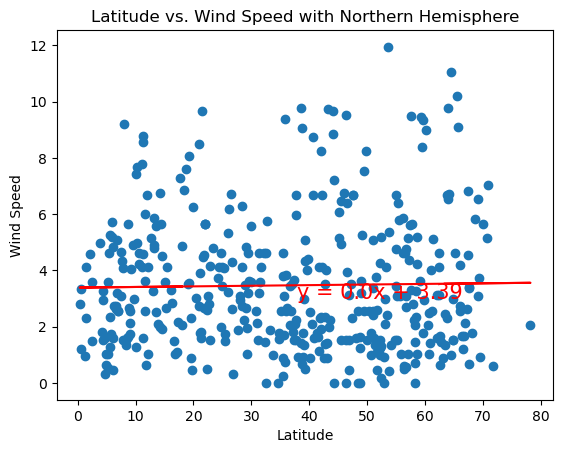

In [77]:
# Northern Hemisphere
plot_linear_regression(
    x_values=northern_hemi_df['Lat'],
    y_values=northern_hemi_df['Wind Speed'],
    x_label='Latitude',
    y_label='Wind Speed',
    title=f"Latitude vs. Wind Speed with Northern Hemisphere"
)

y = -0.02x + 2.98
The r^2-value is: 0.014731696980253887


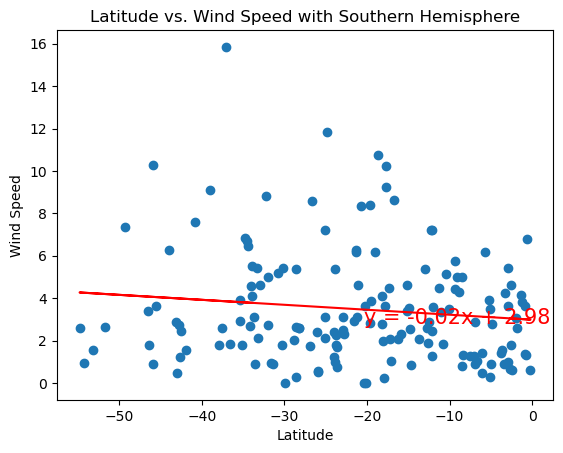

In [78]:
# Southern Hemisphere
plot_linear_regression(
    x_values=southern_hemi_df['Lat'],
    y_values=southern_hemi_df['Wind Speed'],
    x_label='Latitude',
    y_label='Wind Speed',
    title=f"Latitude vs. Wind Speed with Southern Hemisphere"
)

**Discussion about the linear relationship:** 
**Cloudiness vs. Lattitute

1. Northern Hemisphere
    Equation: y=0.0x+3.39
    The r^2-value is: 0.0003462196379637873
-   Interpretation: The positive slope of 0.00 suggests a slight increase in wind speed as latitude increases in the Northern Hemisphere, but the effect is minimal.
-   R2-value: 0.0003, latitude explains only about 0.03% of the variation in wind speed. This is an extremely weak relationship, indicating that other factors play a much larger role in determining wind speeds.

2. Southern Hemisphere
    Equation: y=-0.02x+2.98
    The r^2-value is: 0.014731696980253887
-   Interpretation: The negative slope of −0.02 in the Southern Hemisphere indicates a slight decrease in wind speed as latitude increases (or as we move further south), but this change is minor.
-   R2-value: 0.0147, latitude accounts for only about 1.47% of the variation in wind speed, indicating a very weak relationship. As in the Northern Hemisphere, latitude is not a strong predictor of wind speed.

The very weak correlation between latitude and wind speed in both hemispheres indicates that wind speed is influenced far more by regional and local weather systems than by latitude. A more accurate model would need to include factors such as pressure gradients, topography, and proximity to coastlines to capture the actual patterns of wind speed variation. This analysis highlights that while latitude is often useful in basic climate studies, it is not a comprehensive predictor for wind speed, which depends on more localized meteorological dynamics.